In [1]:
#data processing
import pandas as pd
import numpy as np
import scipy as sp

#statistics
from scipy import stats
import statsmodels.api as sm

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning library
import sklearn

import warnings
warnings.filterwarnings("ignore")
import missingno as msno

In [2]:
# import our packgage
import missdetector as de

### chi2 test

In [3]:
def chi2_test(data, feature_selected, other):
    _null = np.where(dtf[feature_selected].isnull(), True, False)
    data[feature_selected+'_null'] = _null
    row_1 = data[data[feature_selected+'_null']==True].groupby(other)[feature_selected+'_null'].count()
    row_2 = data[data[feature_selected+'_null']==False].groupby(other)[feature_selected+'_null'].count()
    table = [row_1.values,row_2.values]
    from scipy.stats import chi2_contingency
    chi2, p, dof, ex = chi2_contingency(table)
    return p

### knowing missingno python package (visualizing and detecting missing values)

In [4]:
dataset_path_ex_1 = "datasets/MelbourneHousing/train.csv"
dtf = pd.read_csv(dataset_path_ex_1)

<AxesSubplot:>

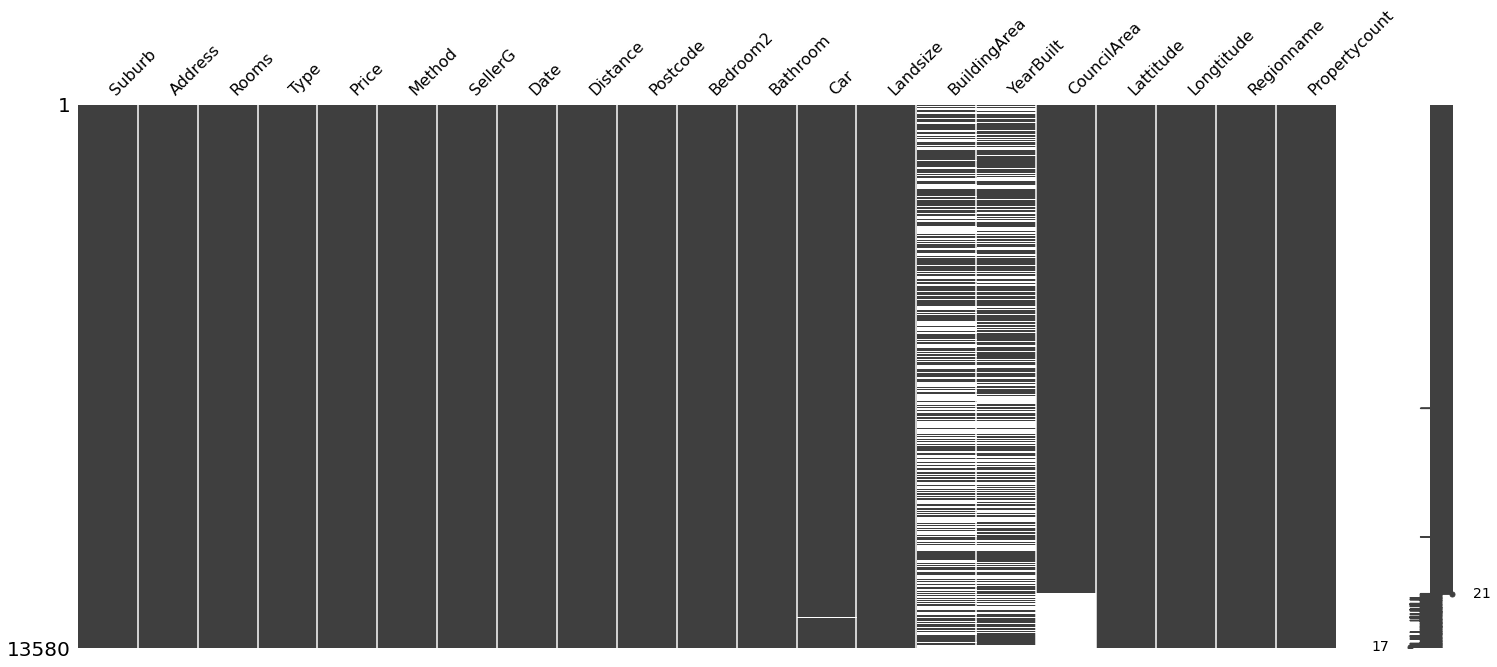

In [5]:
msno.matrix(dtf)

<AxesSubplot:>

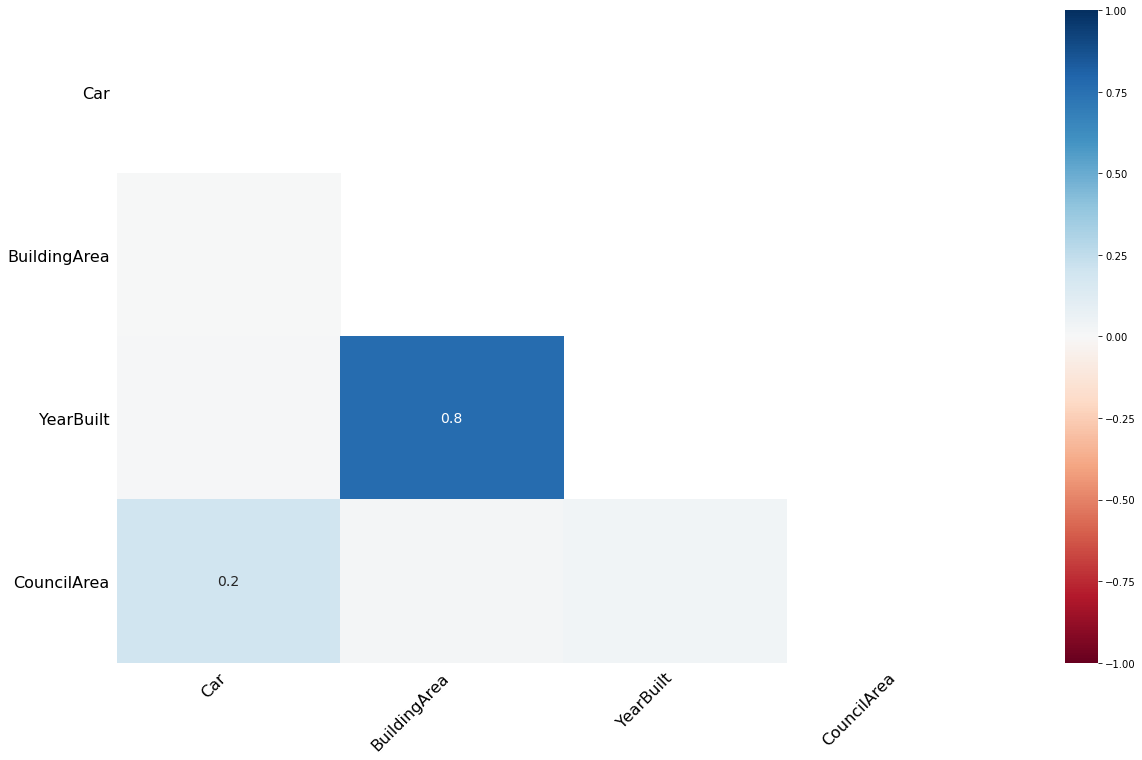

In [6]:
msno.heatmap(dtf)

# our solution (applying on 4 datasets)

### example 1, MelbourneHousing dataset

In [7]:
dataset_path_ex_1 = "datasets/MelbourneHousing/train.csv"
dtf = pd.read_csv(dataset_path_ex_1)

we use our method only on numeric columns

In [8]:
numeric_columns = dtf.dtypes[(dtf.dtypes=="float64") | (dtf.dtypes=="int64")].index.tolist()

In [9]:
dtf.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

we can see that the columns BuildiArea, YearBuilt and CouncilArea have missing values

#### 1.1 detecting the type of missing values

In [10]:
de.detect_type_of_missingness(dtf, 'YearBuilt') # using our library

'mar'

<AxesSubplot:>

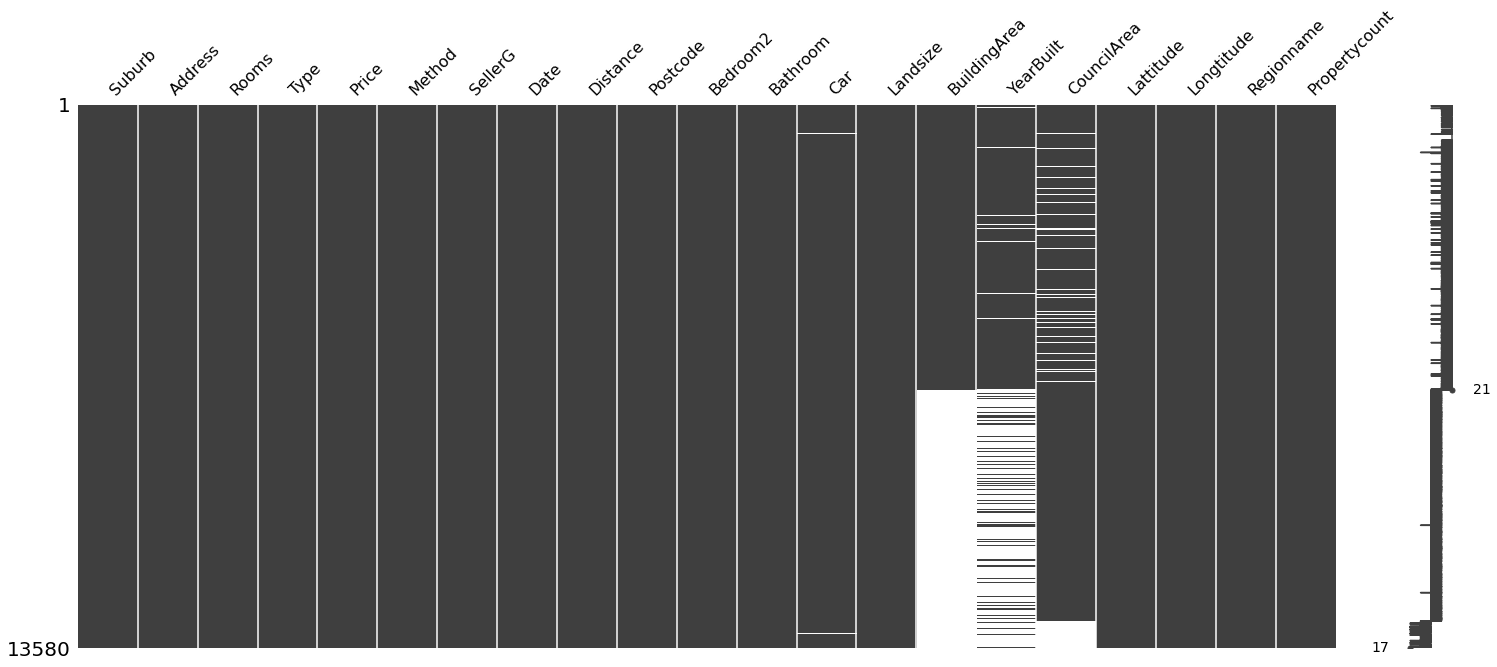

In [11]:
msno.matrix(dtf.sort_values('BuildingArea'))

we can see that if we sort the BuildingArea feature, the YearBuilt null's come together

In [12]:
de.detect_type_of_missingness(dtf, 'BuildingArea')

'mar'

<AxesSubplot:>

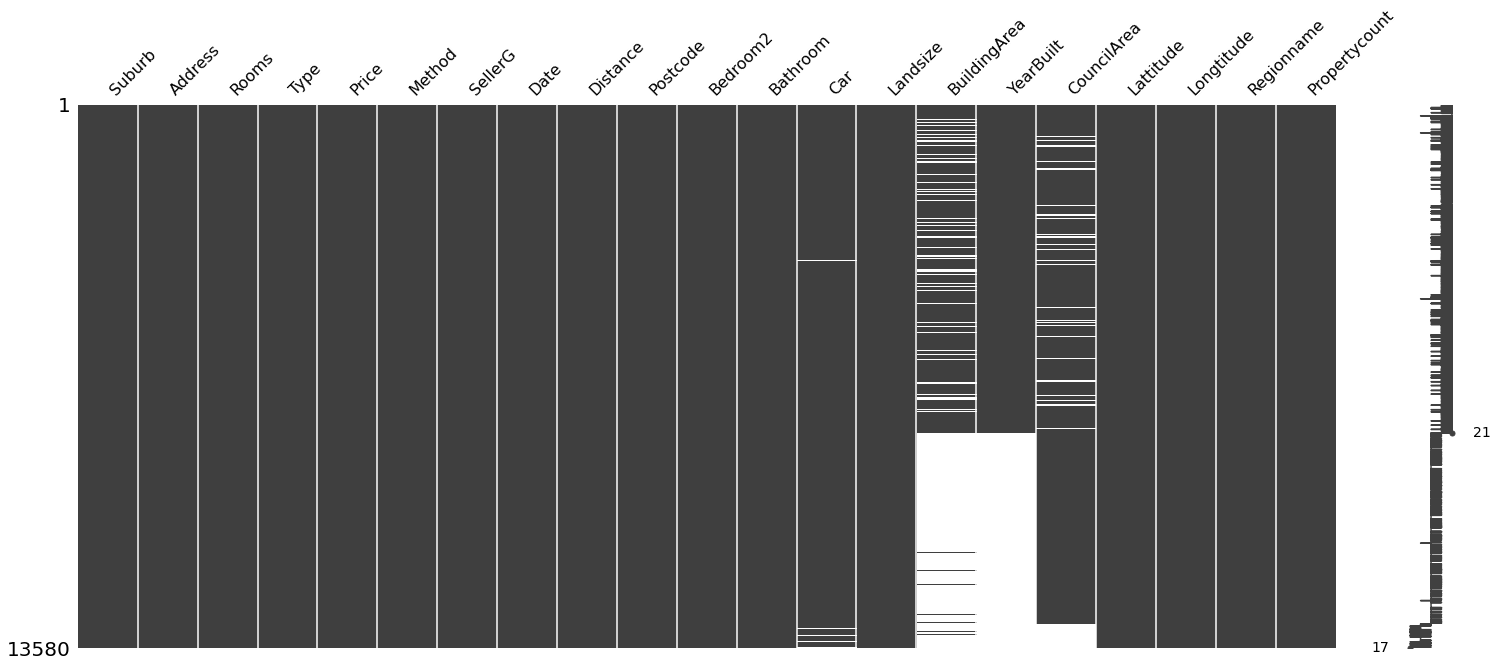

In [13]:
msno.matrix(dtf.sort_values('YearBuilt'))

In [14]:
de.detect_type_of_missingness(dtf, 'YearBuilt')

'mar'

<AxesSubplot:>

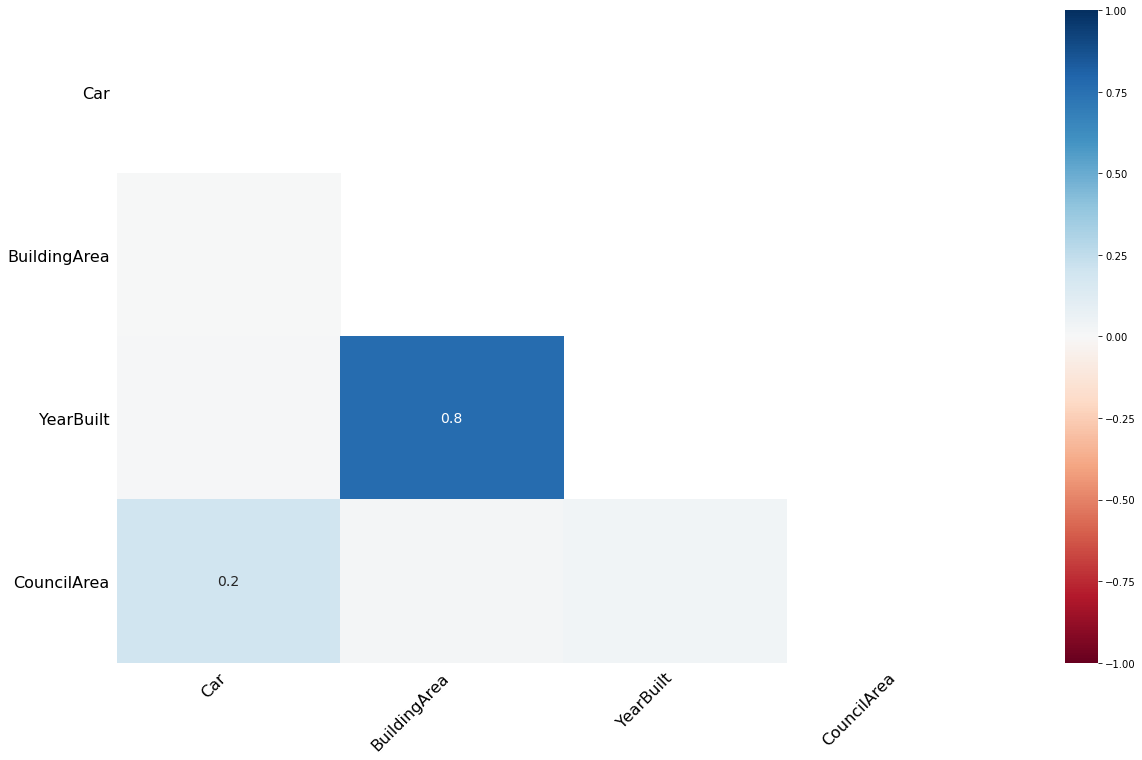

In [15]:
msno.heatmap(dtf)

we can see that BuildingArea has high coorelation with YearBuilt

#### 1.2 Handling the missing values

we can see that the column BuildingArea and YearBuilt are sorted together -> it may be a sign that there is a connection between the missing values in heach columns

In [16]:
skew, option_method = de.dealing_with_mcar(dtf, 'YearBuilt')

In [17]:
option_method

'median'

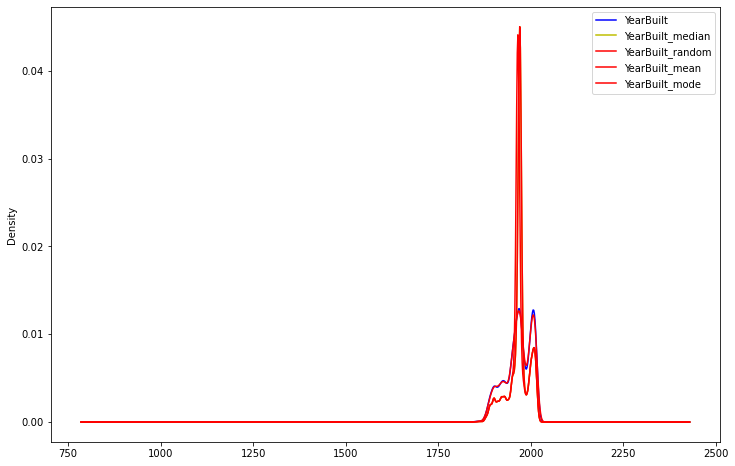

In [18]:
de.plot_handling(dtf, 'YearBuilt')

## example 2, Titanic dataset

In [19]:
dataset_path_ex_2 = "datasets/Titanic/train.csv"
dtf = pd.read_csv(dataset_path_ex_2)

In [20]:
dtf.isnull().sum()  # The missing features

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 2.1 detecting the type of missing values

In [21]:
de.detect_type_of_missingness(dtf, 'Age')

'mar'

In [22]:
critical_value = 0.05
if chi2_test(dtf, "Age", 'Survived') < critical_value:
    print("H0 rejected, The feature is not MCAR")
else:
    print("H0 Approved, the feature is MCAR")

H0 rejected, The feature is not MCAR


In [23]:
dtf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,False


<AxesSubplot:>

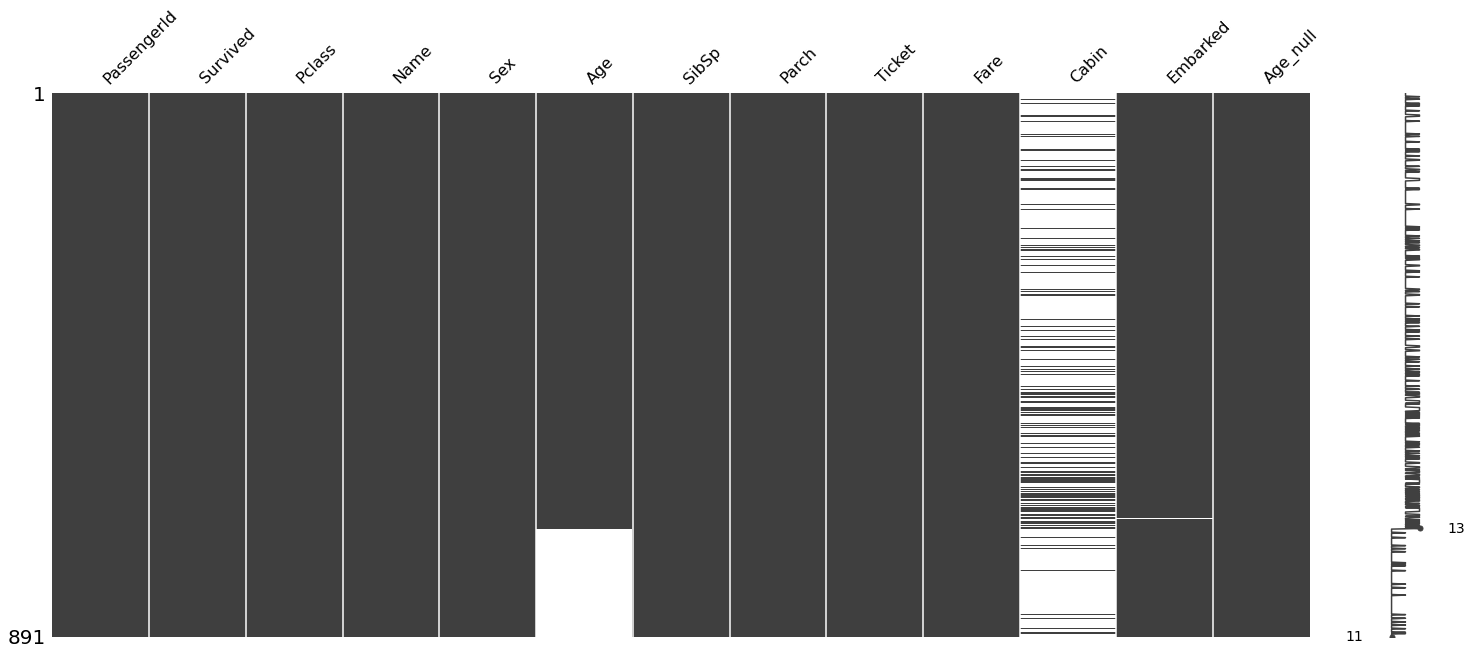

In [24]:
msno.matrix(dtf.sort_values('Age'))

#### we can see that when we sort the values by 'Age' the nulls of 'Cabin' gets closer (after)
#### and before

<AxesSubplot:>

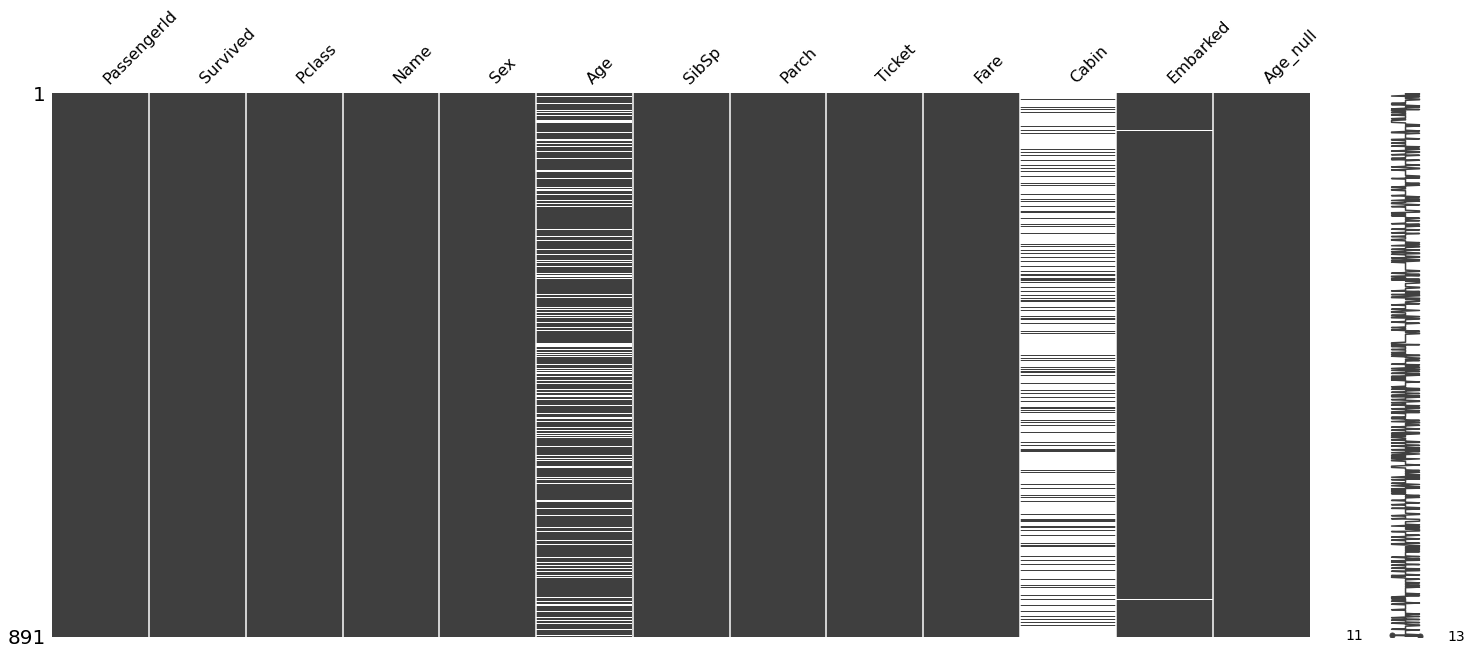

In [25]:
msno.matrix(dtf)

<AxesSubplot:>

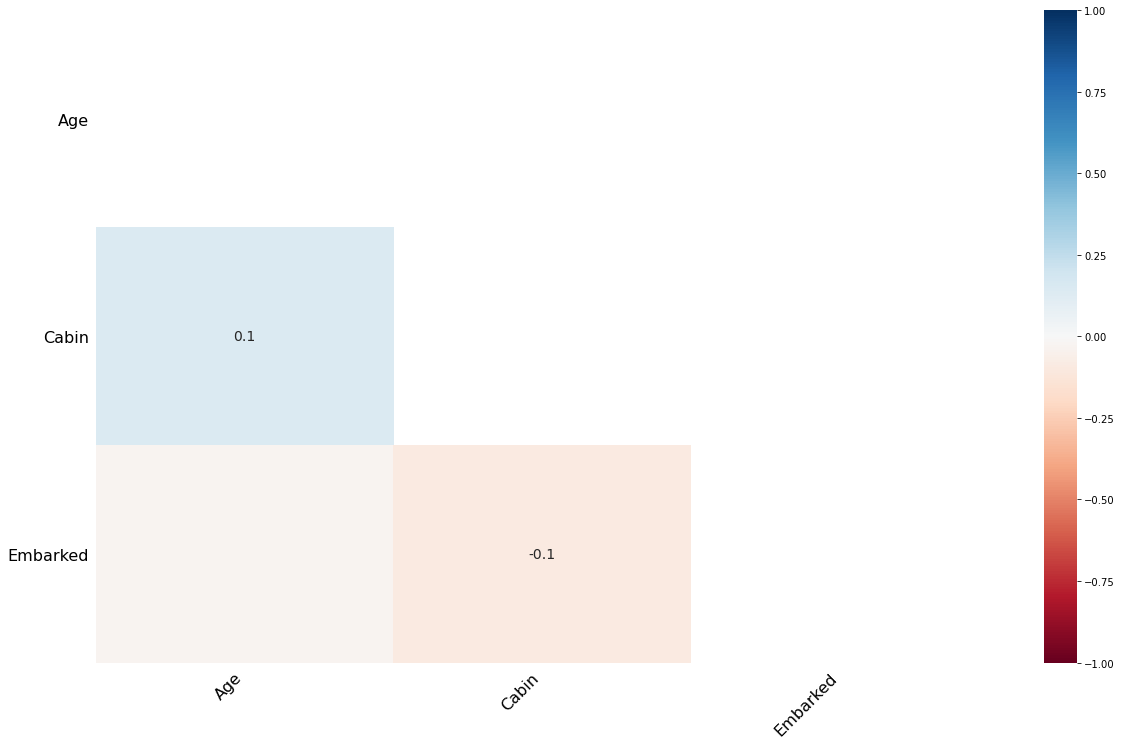

In [26]:
msno.heatmap(dtf)

we can also see that there is no coorelation beteeen Age and other features, so we assign Age as MAR

## exmaple 3, BIgMart dataset

In [27]:
dataset_path_ex_3 = "datasets/BigMart/train.csv"
dtf = pd.read_csv(dataset_path_ex_3)

In [28]:
dtf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [29]:
dtf.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

let's have a look at Item_Weight and Outlet_Size features

##### 3.1 detecting the type of missing values

<AxesSubplot:>

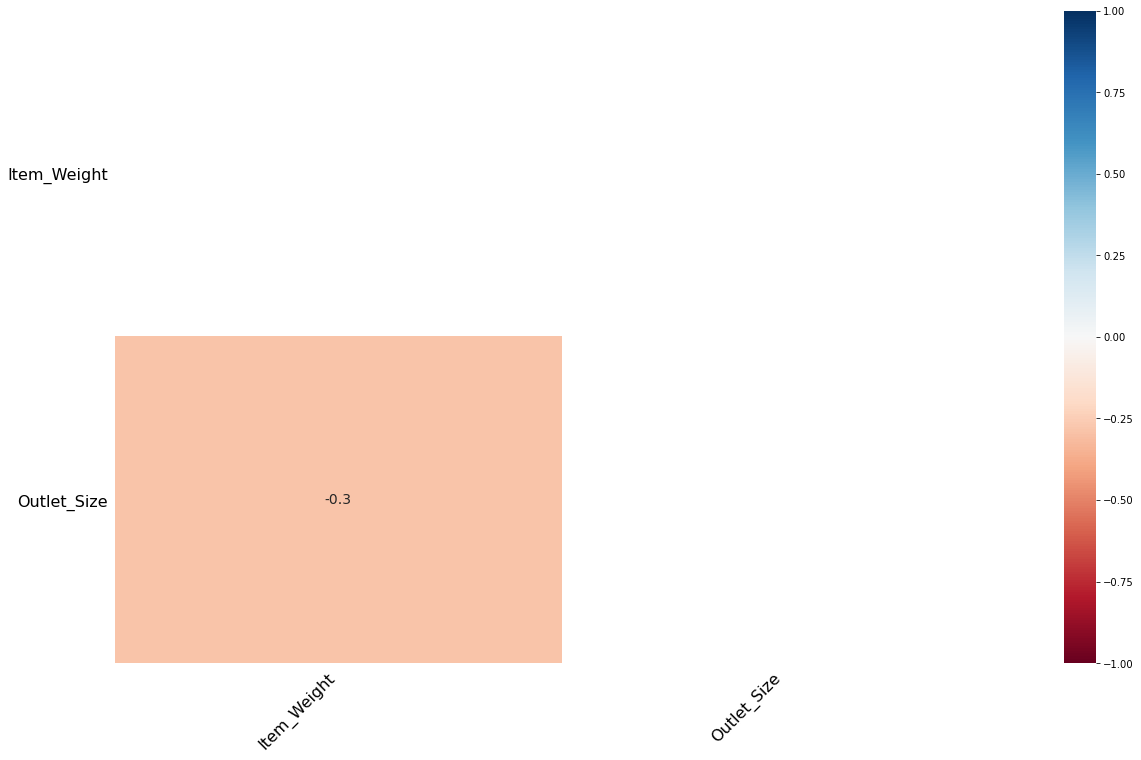

In [30]:
msno.heatmap(dtf)

<AxesSubplot:>

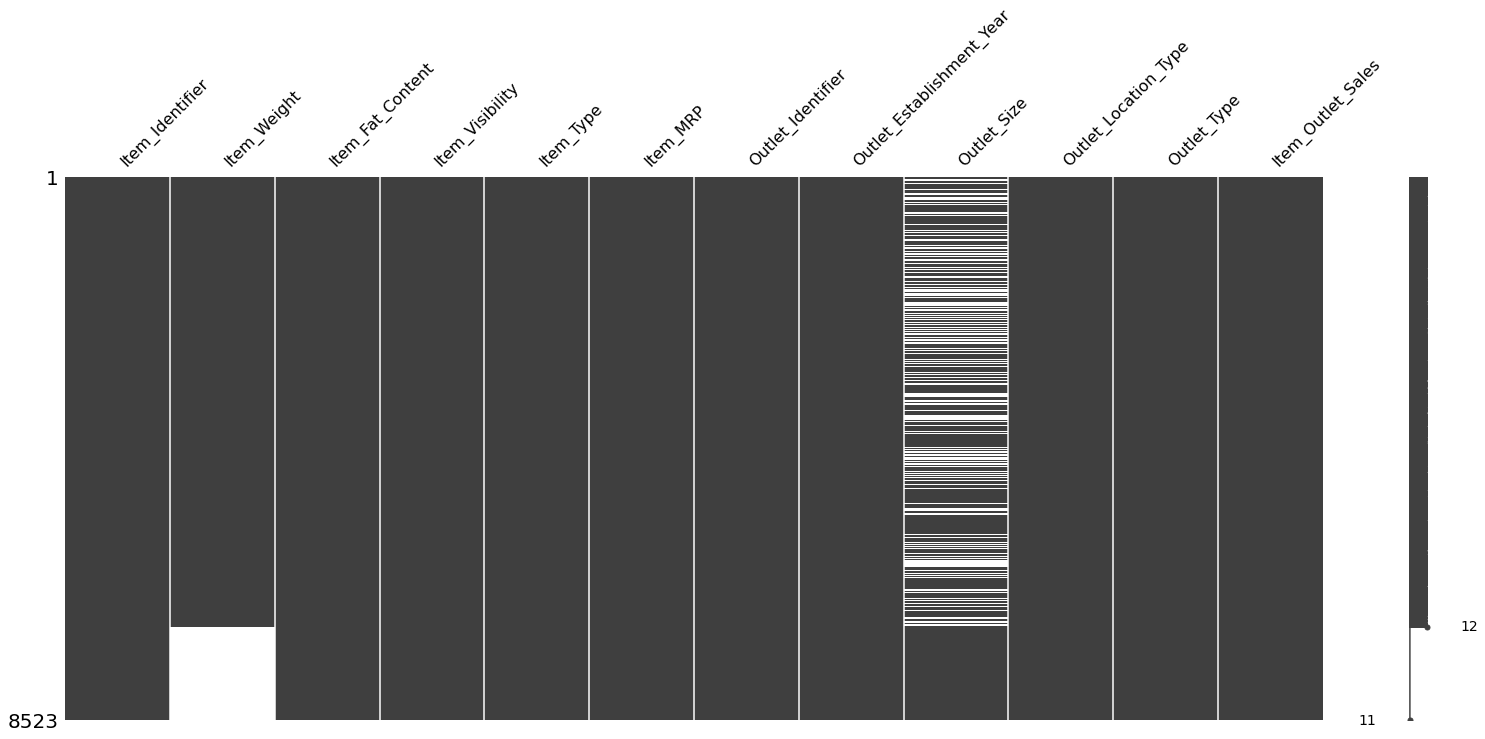

In [31]:
msno.matrix(dtf.sort_values('Item_Weight'))

In [32]:
de.detect_type_of_missingness(dtf, 'Outlet_Size')

'mar'

we can see that when Item_Weight has null values Outlet_size is full and vice versa, when Outlet_size has nullv alues
Item_Weight is full

#### 3.2 handling the missing data values

In [33]:
skew, option_method = de.dealing_with_mcar(dtf, 'Item_Weight')

In [34]:
option_method

'mean'

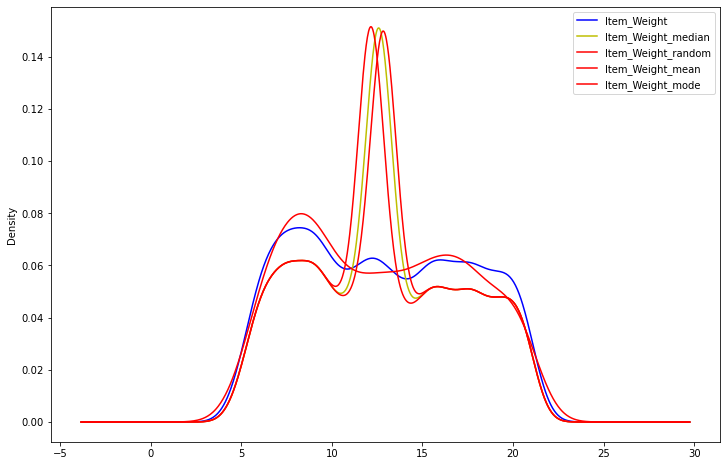

In [35]:
de.plot_handling(dtf, 'Item_Weight')

## example 4

In [36]:
dataset_path_ex_4 = "datasets/Airline/train.csv"
dtf = pd.read_csv(dataset_path_ex_4)

In [37]:
dtf.isnull().sum()

Price          0
Age            0
KM             0
FuelType       0
HP           100
MetColor     100
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

#### 4.1 detecting the type of missing values

<AxesSubplot:>

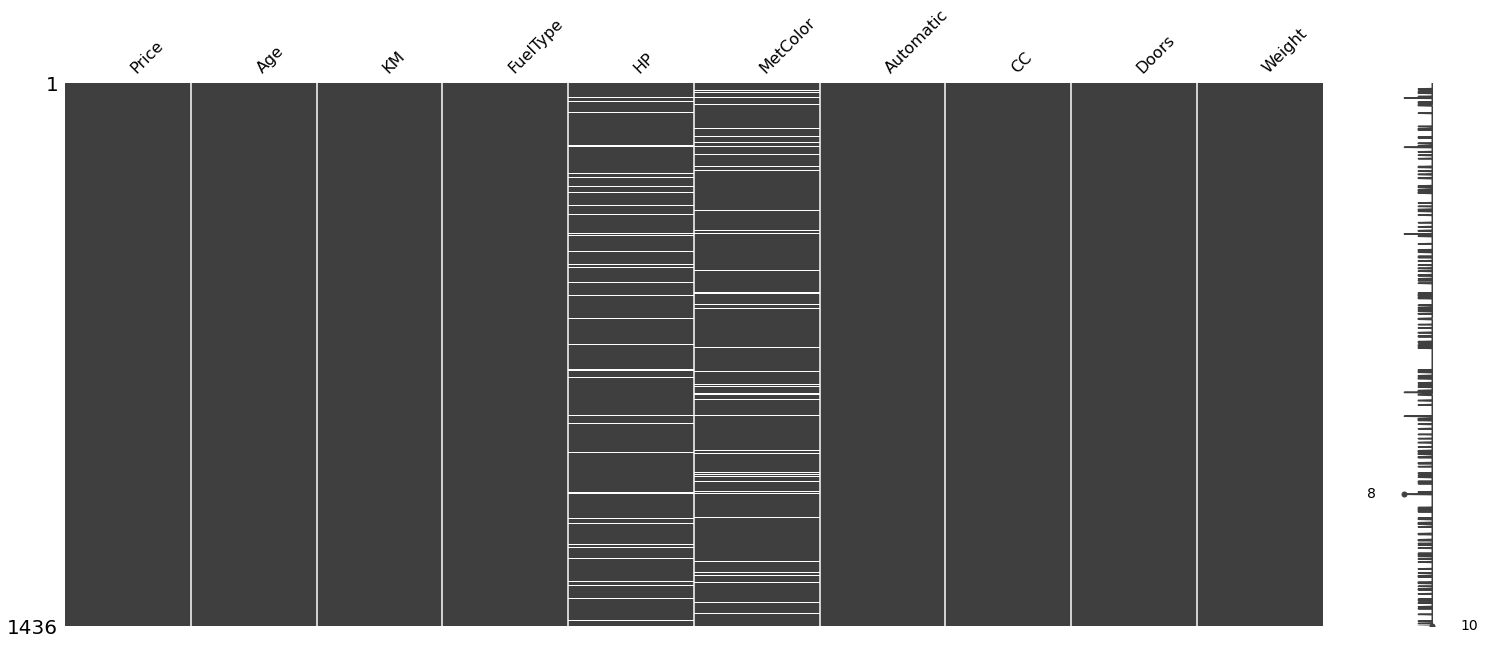

In [38]:
msno.matrix(dtf)

we can see that HP and MetColor are pretty random, looks like mcar

<AxesSubplot:>

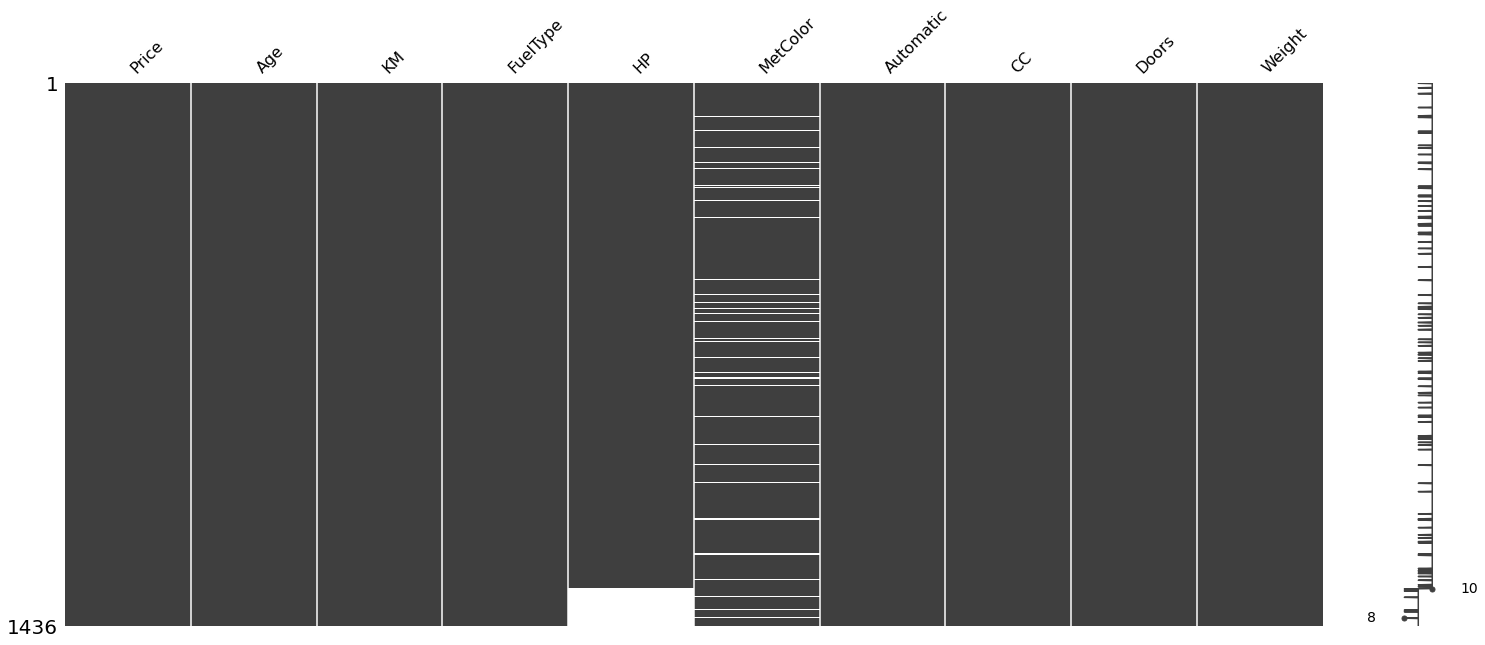

In [39]:
msno.matrix(dtf.sort_values('HP'))

we see that even when we sort the columns, MetColor and Hp are not sortet as well, means there is no coorelation between the columns so they are MCAR

<AxesSubplot:>

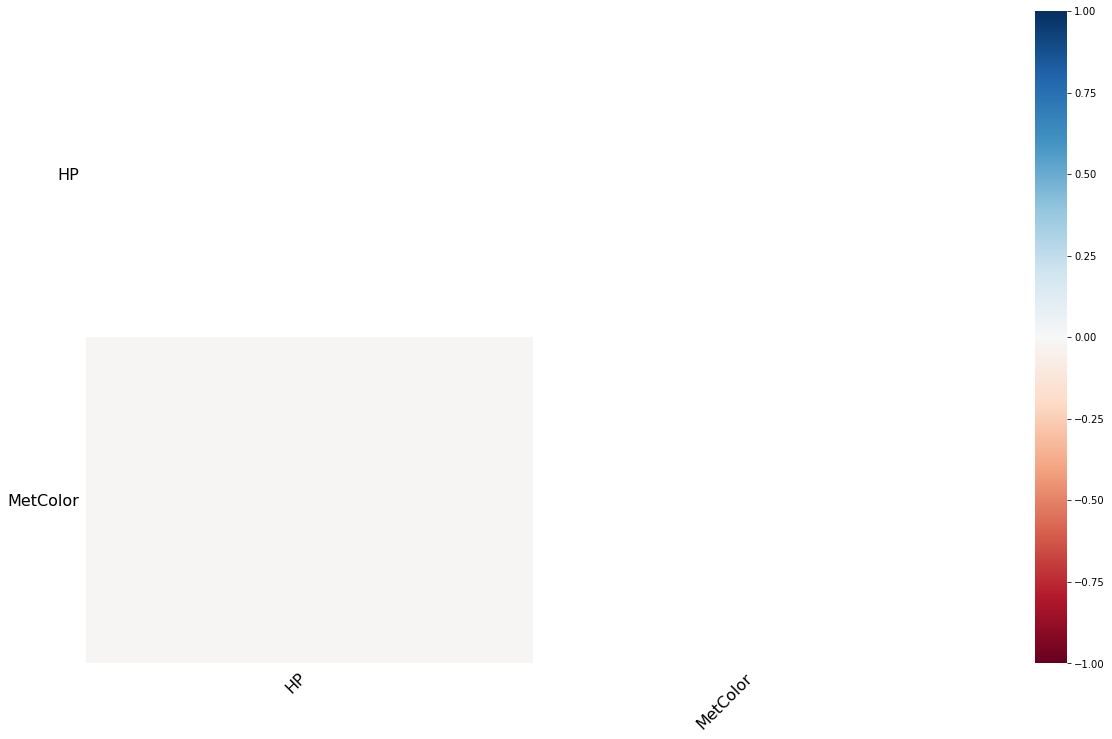

In [40]:
msno.heatmap(dtf)

In [41]:
de.detect_type_of_missingness(dtf, 'HP')

'mcar'

our model also says it's mcar

and also by using chi2 test

In [42]:
critical_value = 0.05
if chi2_test(dtf, "HP", 'MetColor') < critical_value:
    print("H0 rejected, The feature is not MCAR")
else:
    print("H0 Approved, the feature is MCAR")

H0 Approved, the feature is MCAR


#### 4.2 handling the missing data values

In [43]:
skew, option_method = de.dealing_with_mcar(dtf, 'HP')

In [44]:
option_method

'random'

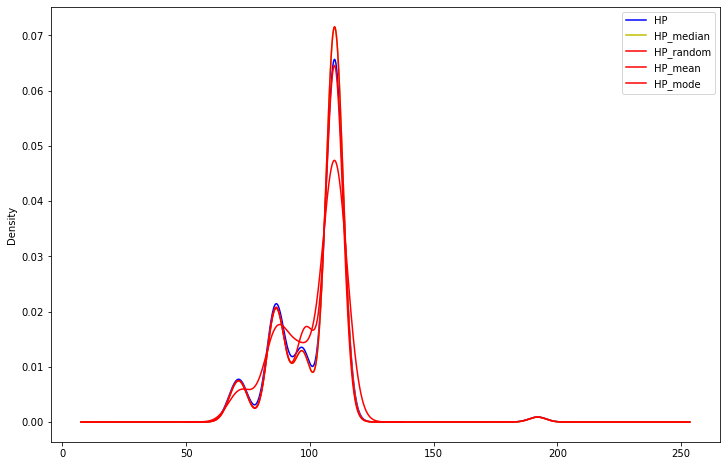

In [45]:
de.plot_handling(dtf, 'HP')